Text(0.5, 1.0, 'Зависимость мощности генерации от мощности накачки при коэффициенте выхода 0.9')

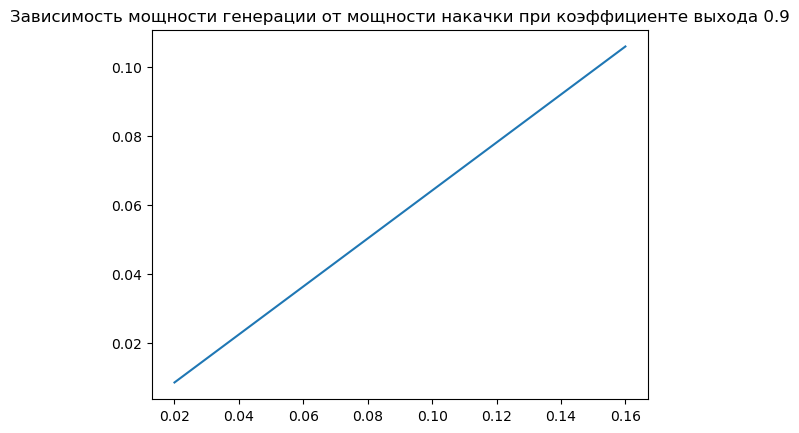

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
# Константы
t21 = 10e-3
h = 6.6e-34
Aeff = 3.14 * (2e-6)**2
Gp = 0.83
Gs = 0.5311143935168284
C = 3e8
hs = 1550e-9
hp = 980e-9
Ner = 1.9e25
alphap = 0.006
alphas = 0.0
l = 3
dhs = 0.16e-9
sigma12S = 3.198e-25
sigma21S = 4.4e-25
sigma12P = 2.245e-25
sigma21P = 0.0
z0 = 0
Z = 100
H = l / Z
z = np.linspace(z0, l, Z)
# Функции для расчета изменений концентраций и мощностей
def dN2(z, N2, Pp, Ps):
    return Gp * hp / (h * C * Aeff ) * (sigma12P * (Ner - N2) - sigma21P * N2) * Pp + Gs * hs / (h * C * Aeff) * \
           (sigma12S * (Ner  - N2) - sigma21S * N2) * Ps - N2 / t21
def dPp(z, N2, Pp):
    return Gp * (sigma21P * N2 - sigma12P * (Ner - N2)) * Pp - alphap * Pp
def dPs(z, N2, Ps):
    return Gs * (sigma21S * N2 - sigma12S * (Ner  - N2)) * Ps - alphas * Ps + 2 * sigma21S * N2 * h * C**2 * dhs / (hs**3)
# Объединяем функции в одну для использования в solve_ivp
def system(t, y):
    N2, Pp, Ps = y
    return [dN2(t, N2, Pp, Ps), dPp(t, N2, Pp), dPs(t, N2, Ps)]
# Функция для численного решения системы ОДУ методом Рунге-Кутты 4-го порядка
def propa(Pp0, Ps0):
    # Начальные условия
    N20 = 0.0
    # Решение системы дифференциальных уравнений методом Рунге-Кутта четвертого порядка
    sol = solve_ivp(system, [z0, l], [N20, Pp0, Ps0], method='RK45', max_step=H)
    # Получение решений
    N2 = sol.y[0]
    Pp = sol.y[1]
    Ps = sol.y[2]
    # Интерполяция решений на сетку z
    N2_interp = np.interp(z, sol.t, N2)
    Pp_interp = np.interp(z, sol.t, Pp)
    Ps_interp = np.interp(z, sol.t, Ps) 
    return N2_interp, Pp_interp, Ps_interp
# Вызов функции и получение результатов для 90% - выхода +
N21, Pp1, Ps1 = propa(40e-3, 0.002247964941077592)
N22, Pp2, Ps2 = propa(60e-3, 0.0036374311671429765)
N23, Pp3, Ps3 = propa(80e-3, 0.0050268974381731165)
N24, Pp4, Ps4 = propa(100e-3, 0.006416366199462061)
N25, Pp5, Ps5 = propa(120e-3, 0.007805831908027835)
N26, Pp6, Ps6 = propa(20e-3, 0.0008585061576054216)
N27, Pp7, Ps7 = propa(140e-3, 0.009195299152758457)
N28, Pp8, Ps8 = propa(160e-3, 0.01058476824010326)
PP = np.array([Pp6[0], Pp1[0], Pp2[0], Pp3[0], Pp4[0], Pp5[0], Pp7[0], Pp8[0]])
PS = np.array([Ps6[-1],Ps1[-1], Ps2[-1], Ps3[-1], Ps4[-1], Ps5[-1], Ps7[-1], Ps8[-1]])
plt.plot(PP, PS, label ='EDF L=6m, Coupling ratio=0.9')
plt.title("Зависимость мощности генерации от мощности накачки при коэффициенте выхода 0.9")

Text(0.5, 1.0, 'Зависимость мощности генерации от мощности накачки при коэффициенте выхода 0.99')

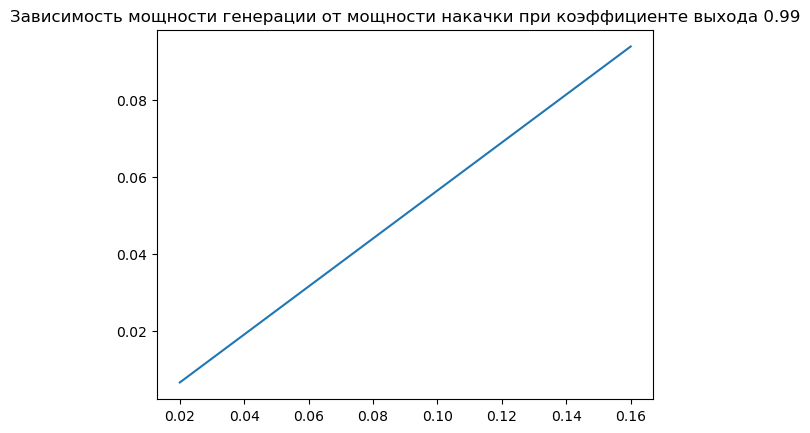

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
# Константы
t21 = 10e-3
h = 6.6e-34
Aeff = 3.14 * (2e-6)**2
Gp = 0.83
Gs = 0.5311143935168284
C = 3e8
hs = 1550e-9
hp = 980e-9
Ner = 1.9e25
alphap = 0.006
alphas = 0.0
l = 3
dhs = 0.16e-9
sigma12S = 3.198e-25
sigma21S = 4.4e-25
sigma12P = 2.245e-25
sigma21P = 0.0
z0 = 0
Z = 100
H = l / Z
z = np.linspace(z0, l, Z)
# Функции для расчета изменений концентраций и мощностей
def dN2(z, N2, Pp, Ps):
    return Gp * hp / (h * C * Aeff ) * (sigma12P * (Ner - N2) - sigma21P * N2) * Pp + Gs * hs / (h * C * Aeff) * \
           (sigma12S * (Ner  - N2) - sigma21S * N2) * Ps - N2 / t21
def dPp(z, N2, Pp):
    return Gp * (sigma21P * N2 - sigma12P * (Ner - N2)) * Pp - alphap * Pp
def dPs(z, N2, Ps):
    return Gs * (sigma21S * N2 - sigma12S * (Ner  - N2)) * Ps - alphas * Ps + 2 * sigma21S * N2 * h * C**2 * dhs / (hs**3)
# Объединяем функции в одну для использования в solve_ivp
def system(t, y):
    N2, Pp, Ps = y
    return [dN2(t, N2, Pp, Ps), dPp(t, N2, Pp), dPs(t, N2, Ps)]
# Функция для численного решения системы ОДУ методом Рунге-Кутты 4-го порядка
def propa(Pp0, Ps0):
    # Начальные условия
    N20 = 0.0
    # Решение системы дифференциальных уравнений методом Рунге-Кутта четвертого порядка
    sol = solve_ivp(system, [z0, l], [N20, Pp0, Ps0], method='RK45', max_step=H)
    # Получение решений
    N2 = sol.y[0]
    Pp = sol.y[1]
    Ps = sol.y[2]
    # Интерполяция решений на сетку z
    N2_interp = np.interp(z, sol.t, N2)
    Pp_interp = np.interp(z, sol.t, Pp)
    Ps_interp = np.interp(z, sol.t, Ps) 
    return N2_interp, Pp_interp, Ps_interp

#Для 99% выхода + 
N21_99, Pp1_99, Ps1_99 = propa(40e-3, 0.00019151702988250935)
N22_99, Pp2_99, Ps2_99 = propa(60e-3, 0.0003160058600437555)
N23_99, Pp3_99, Ps3_99 = propa(80e-3, 0.00044049551414909787)
N24_99, Pp4_99, Ps4_99 = propa(100e-3,  0.0005649853391193708)
N25_99, Pp5_99, Ps5_99 = propa(120e-3, 0.0006894754392289913)
N26_99, Pp6_99, Ps6_99 = propa(20e-3, 6.703544246963447e-05)
N27_99, Pp7_99, Ps7_99 = propa(140e-3,  0.0008139653600445639)
N28_99, Pp8_99, Ps8_99 = propa(160e-3,  0.0009384633367504937)
PP_99 = np.array([Pp6_99[0], Pp1_99[0], Pp2_99[0], Pp3_99[0], Pp4_99[0], Pp5_99[0], Pp7_99[0], Pp8_99[0]])
PS_99 = np.array([Ps6_99[-1],Ps1_99[-1], Ps2_99[-1], Ps3_99[-1], Ps4_99[-1], Ps5_99[-1], Ps7_99[-1], Ps8_99[-1]])
plt.plot(PP_99, PS_99, label ='EDF L=6m, Coupling ratio=0.9')
plt.title("Зависимость мощности генерации от мощности накачки при коэффициенте выхода 0.99")

Text(0.5, 1.0, 'Зависимость мощности генерации от мощности накачки при коэффициенте выхода 0.95')

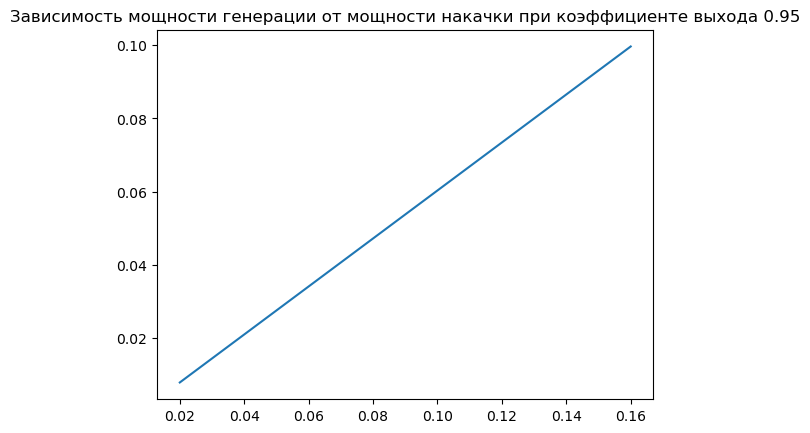

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
# Константы
t21 = 10e-3
h = 6.6e-34
Aeff = 3.14 * (2e-6)**2
Gp = 0.83
Gs = 0.5311143935168284
C = 3e8
hs = 1550e-9
hp = 980e-9
Ner = 1.9e25
alphap = 0.006
alphas = 0.0
l = 3
dhs = 0.16e-9
sigma12S = 3.198e-25
sigma21S = 4.4e-25
sigma12P = 2.245e-25
sigma21P = 0.0
z0 = 0
Z = 100
H = l / Z
z = np.linspace(z0, l, Z)
# Функции для расчета изменений концентраций и мощностей
def dN2(z, N2, Pp, Ps):
    return Gp * hp / (h * C * Aeff ) * (sigma12P * (Ner - N2) - sigma21P * N2) * Pp + Gs * hs / (h * C * Aeff) * \
           (sigma12S * (Ner  - N2) - sigma21S * N2) * Ps - N2 / t21
def dPp(z, N2, Pp):
    return Gp * (sigma21P * N2 - sigma12P * (Ner - N2)) * Pp - alphap * Pp
def dPs(z, N2, Ps):
    return Gs * (sigma21S * N2 - sigma12S * (Ner  - N2)) * Ps - alphas * Ps + 2 * sigma21S * N2 * h * C**2 * dhs / (hs**3)
# Объединяем функции в одну для использования в solve_ivp
def system(t, y):
    N2, Pp, Ps = y
    return [dN2(t, N2, Pp, Ps), dPp(t, N2, Pp), dPs(t, N2, Ps)]
# Функция для численного решения системы ОДУ методом Рунге-Кутты 4-го порядка
def propa(Pp0, Ps0):
    # Начальные условия
    N20 = 0.0
    # Решение системы дифференциальных уравнений методом Рунге-Кутта четвертого порядка
    sol = solve_ivp(system, [z0, l], [N20, Pp0, Ps0], method='RK45', max_step=H)
    # Получение решений
    N2 = sol.y[0]
    Pp = sol.y[1]
    Ps = sol.y[2]
    # Интерполяция решений на сетку z
    N2_interp = np.interp(z, sol.t, N2)
    Pp_interp = np.interp(z, sol.t, Pp)
    Ps_interp = np.interp(z, sol.t, Ps) 
    return N2_interp, Pp_interp, Ps_interp
# Вызов функции и получение результатов для 90% - выхода +

#Для 95% выхода +
N21_95, Pp1_95, Ps1_95 = propa(40e-3, 0.0010462485408549785)
N22_95, Pp2_95, Ps2_95 = propa(60e-3, 0.0017023800505818036)
N23_95, Pp3_95, Ps3_95 = propa(80e-3, 0.00235849620823549)
N24_95, Pp4_95, Ps4_95 = propa(100e-3,0.003014611512156072)
N25_95, Pp5_95, Ps5_95 = propa(120e-3, 0.0036707275982763347)
N26_95, Pp6_95, Ps6_95 = propa(20e-3, 0.0003901590029549401)
N27_95, Pp7_95, Ps7_95 = propa(140e-3, 0.0043268437209447235)
N28_95, Pp8_95, Ps8_95 = propa(160e-3, 0.004982960212338263)
PP_95 = np.array([Pp6_95[0], Pp1_95[0], Pp2_95[0], Pp3_95[0], Pp4_95[0], Pp5_95[0], Pp7_95[0], Pp8_95[0]])
PS_95 = np.array([Ps6_95[-1],Ps1_95[-1], Ps2_95[-1], Ps3_95[-1], Ps4_95[-1], Ps5_95[-1], Ps7_95[-1], Ps8_95[-1]])
plt.plot(PP_95, PS_95, label ='EDF L=6m, Coupling ratio=0.9')
plt.title("Зависимость мощности генерации от мощности накачки при коэффициенте выхода 0.95")

Text(0.5, 1.0, 'Зависимость мощности генерации от мощности накачки при коэффициенте выхода 0.8')

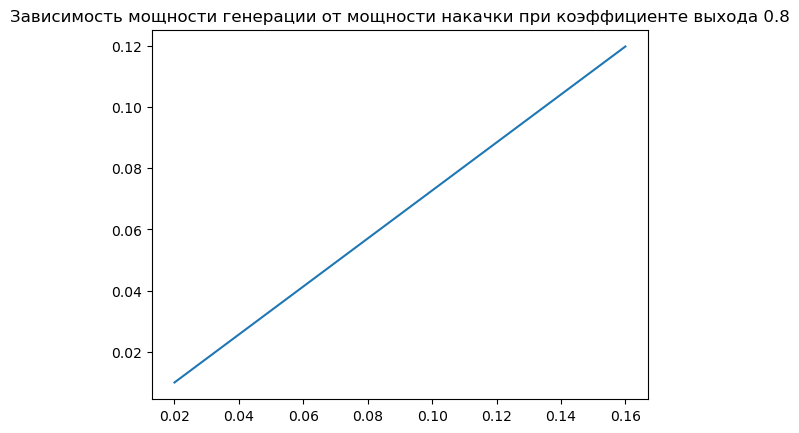

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
# Константы
t21 = 10e-3
h = 6.6e-34
Aeff = 3.14 * (2e-6)**2
Gp = 0.83
Gs = 0.5311143935168284
C = 3e8
hs = 1550e-9
hp = 980e-9
Ner = 1.9e25
alphap = 0.006
alphas = 0.0
l = 3
dhs = 0.16e-9
sigma12S = 3.198e-25
sigma21S = 4.4e-25
sigma12P = 2.245e-25
sigma21P = 0.0
z0 = 0
Z = 100
H = l / Z
z = np.linspace(z0, l, Z)
# Функции для расчета изменений концентраций и мощностей
def dN2(z, N2, Pp, Ps):
    return Gp * hp / (h * C * Aeff ) * (sigma12P * (Ner - N2) - sigma21P * N2) * Pp + Gs * hs / (h * C * Aeff) * \
           (sigma12S * (Ner  - N2) - sigma21S * N2) * Ps - N2 / t21
def dPp(z, N2, Pp):
    return Gp * (sigma21P * N2 - sigma12P * (Ner - N2)) * Pp - alphap * Pp
def dPs(z, N2, Ps):
    return Gs * (sigma21S * N2 - sigma12S * (Ner  - N2)) * Ps - alphas * Ps + 2 * sigma21S * N2 * h * C**2 * dhs / (hs**3)
# Объединяем функции в одну для использования в solve_ivp
def system(t, y):
    N2, Pp, Ps = y
    return [dN2(t, N2, Pp, Ps), dPp(t, N2, Pp), dPs(t, N2, Ps)]
# Функция для численного решения системы ОДУ методом Рунге-Кутты 4-го порядка
def propa(Pp0, Ps0):
    # Начальные условия
    N20 = 0.0
    # Решение системы дифференциальных уравнений методом Рунге-Кутта четвертого порядка
    sol = solve_ivp(system, [z0, l], [N20, Pp0, Ps0], method='RK45', max_step=H)
    # Получение решений
    N2 = sol.y[0]
    Pp = sol.y[1]
    Ps = sol.y[2]
    # Интерполяция решений на сетку z
    N2_interp = np.interp(z, sol.t, N2)
    Pp_interp = np.interp(z, sol.t, Pp)
    Ps_interp = np.interp(z, sol.t, Ps) 
    return N2_interp, Pp_interp, Ps_interp

#Для 80% выхода +
N21_80, Pp1_80, Ps1_80 = propa(40e-3, 0.005141874306485649)
N22_80, Pp2_80, Ps2_80 = propa(60e-3, 0.008275743598271532)
N23_80, Pp3_80, Ps3_80 = propa(80e-3, 0.01140961166614667)
N24_80, Pp4_80, Ps4_80 = propa(100e-3,  0.014543481208180935)
N25_80, Pp5_80, Ps5_80 = propa(120e-3, 0.017677352205180186)
N26_80, Pp6_80, Ps6_80 = propa(20e-3, 0.00200800555660353)
N27_80, Pp7_80, Ps7_80 = propa(140e-3,  0.020811220655283767)
N28_80, Pp8_80, Ps8_80 = propa(160e-3,   0.023945090031915927)
PP_80 = np.array([Pp6_80[0], Pp1_80[0], Pp2_80[0], Pp3_80[0], Pp4_80[0], Pp5_80[0], Pp7_80[0], Pp8_80[0]])
PS_80 = np.array([Ps6_80[-1],Ps1_80[-1], Ps2_80[-1], Ps3_80[-1], Ps4_80[-1], Ps5_80[-1], Ps7_80[-1], Ps8_80[-1]])
plt.plot(PP_80, PS_80, label ='EDF L=6m, Coupling ratio=0.8')
plt.title("Зависимость мощности генерации от мощности накачки при коэффициенте выхода 0.8")

Text(0.5, 1.0, 'Зависимость мощности генерации от мощности накачки при коэффициенте выхода 0.5')

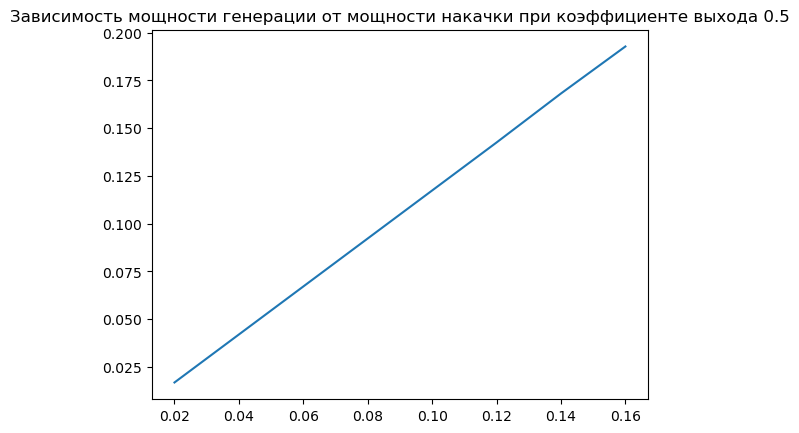

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
# Константы
t21 = 10e-3
h = 6.6e-34
Aeff = 3.14 * (2e-6)**2
Gp = 0.83
Gs = 0.5311143935168284
C = 3e8
hs = 1550e-9
hp = 980e-9
Ner = 1.9e25
alphap = 0.006
alphas = 0.0
l = 3
dhs = 0.16e-9
sigma12S = 3.198e-25
sigma21S = 4.4e-25
sigma12P = 2.245e-25
sigma21P = 0.0
z0 = 0
Z = 100
H = l / Z
z = np.linspace(z0, l, Z)
# Функции для расчета изменений концентраций и мощностей
def dN2(z, N2, Pp, Ps):
    return Gp * hp / (h * C * Aeff ) * (sigma12P * (Ner - N2) - sigma21P * N2) * Pp + Gs * hs / (h * C * Aeff) * \
           (sigma12S * (Ner  - N2) - sigma21S * N2) * Ps - N2 / t21
def dPp(z, N2, Pp):
    return Gp * (sigma21P * N2 - sigma12P * (Ner - N2)) * Pp - alphap * Pp
def dPs(z, N2, Ps):
    return Gs * (sigma21S * N2 - sigma12S * (Ner  - N2)) * Ps - alphas * Ps + 2 * sigma21S * N2 * h * C**2 * dhs / (hs**3)
# Объединяем функции в одну для использования в solve_ivp
def system(t, y):
    N2, Pp, Ps = y
    return [dN2(t, N2, Pp, Ps), dPp(t, N2, Pp), dPs(t, N2, Ps)]
# Функция для численного решения системы ОДУ методом Рунге-Кутты 4-го порядка
def propa(Pp0, Ps0):
    # Начальные условия
    N20 = 0.0
    # Решение системы дифференциальных уравнений методом Рунге-Кутта четвертого порядка
    sol = solve_ivp(system, [z0, l], [N20, Pp0, Ps0], method='RK45', max_step=H)
    # Получение решений
    N2 = sol.y[0]
    Pp = sol.y[1]
    Ps = sol.y[2]
    # Интерполяция решений на сетку z
    N2_interp = np.interp(z, sol.t, N2)
    Pp_interp = np.interp(z, sol.t, Pp)
    Ps_interp = np.interp(z, sol.t, Ps) 
    return N2_interp, Pp_interp, Ps_interp

#Для 50% выход + 
N21_50, Pp1_50, Ps1_50 = propa(40e-3,  0.020991958056930757)
N22_50, Pp2_50, Ps2_50 = propa(60e-3, 0.03355727482122567)
N23_50, Pp3_50, Ps3_50 = propa(80e-3, 0.04612258866070121)
N24_50, Pp4_50, Ps4_50 = propa(100e-3, 0.058687898974782986)
N25_50, Pp5_50, Ps5_50 = propa(120e-3, 0.07125320666197733)
N26_50, Pp6_50, Ps6_50 = propa(20e-3, 0.008426619903123678)
N27_50, Pp7_50, Ps7_50 = propa(140e-3, 0.084335207180921994)
N28_50, Pp8_50, Ps8_50 = propa(160e-3, 0.0963838207017215)
PP_50 = np.array([Pp6_50[0], Pp1_50[0], Pp2_50[0], Pp3_50[0], Pp4_50[0], Pp5_50[0], Pp7_50[0], Pp8_50[0]])
PS_50 = np.array([Ps6_50[-1],Ps1_50[-1], Ps2_50[-1], Ps3_50[-1], Ps4_50[-1], Ps5_50[-1], Ps7_50[-1], Ps8_50[-1]])
plt.plot(PP_50, PS_50, label ='EDF L=6m, Coupling ratio=0.8')
plt.title("Зависимость мощности генерации от мощности накачки при коэффициенте выхода 0.5")

Text(0.5, 1.0, 'Зависимость мощности генерации от мощности накачки при коэффициенте выхода 0.2')

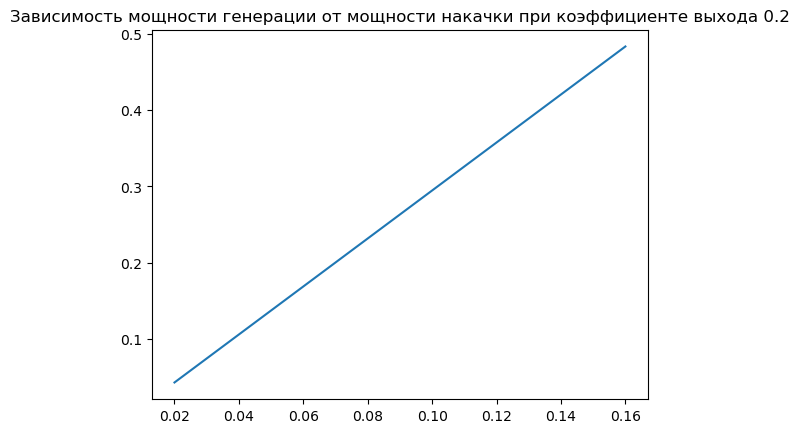

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
# Константы
t21 = 10e-3
h = 6.6e-34
Aeff = 3.14 * (2e-6)**2
Gp = 0.83
Gs = 0.5311143935168284
C = 3e8
hs = 1550e-9
hp = 980e-9
Ner = 1.9e25
alphap = 0.006
alphas = 0.0
l = 3
dhs = 0.16e-9
sigma12S = 3.198e-25
sigma21S = 4.4e-25
sigma12P = 2.245e-25
sigma21P = 0.0
z0 = 0
Z = 100
H = l / Z
z = np.linspace(z0, l, Z)
# Функции для расчета изменений концентраций и мощностей
def dN2(z, N2, Pp, Ps):
    return Gp * hp / (h * C * Aeff ) * (sigma12P * (Ner - N2) - sigma21P * N2) * Pp + Gs * hs / (h * C * Aeff) * \
           (sigma12S * (Ner  - N2) - sigma21S * N2) * Ps - N2 / t21
def dPp(z, N2, Pp):
    return Gp * (sigma21P * N2 - sigma12P * (Ner - N2)) * Pp - alphap * Pp
def dPs(z, N2, Ps):
    return Gs * (sigma21S * N2 - sigma12S * (Ner  - N2)) * Ps - alphas * Ps + 2 * sigma21S * N2 * h * C**2 * dhs / (hs**3)
# Объединяем функции в одну для использования в solve_ivp
def system(t, y):
    N2, Pp, Ps = y
    return [dN2(t, N2, Pp, Ps), dPp(t, N2, Pp), dPs(t, N2, Ps)]
# Функция для численного решения системы ОДУ методом Рунге-Кутты 4-го порядка
def propa(Pp0, Ps0):
    # Начальные условия
    N20 = 0.0
    # Решение системы дифференциальных уравнений методом Рунге-Кутта четвертого порядка
    sol = solve_ivp(system, [z0, l], [N20, Pp0, Ps0], method='RK45', max_step=H)
    # Получение решений
    N2 = sol.y[0]
    Pp = sol.y[1]
    Ps = sol.y[2]
    # Интерполяция решений на сетку z
    N2_interp = np.interp(z, sol.t, N2)
    Pp_interp = np.interp(z, sol.t, Pp)
    Ps_interp = np.interp(z, sol.t, Ps) 
    return N2_interp, Pp_interp, Ps_interp

#Для 20% выхода +
N21_20, Pp1_20, Ps1_20 = propa(40e-3, 0.08481159330520721)
N22_20, Pp2_20, Ps2_20 = propa(60e-3, 0.13511970560306774)
N23_20, Pp3_20, Ps3_20 = propa(80e-3, 0.18542779044026883)
N24_20, Pp4_20, Ps4_20 = propa(100e-3,  0.2357358709825198)
N25_20, Pp5_20, Ps5_20 = propa(120e-3, 0.28604396364846246)
N26_20, Pp6_20, Ps6_20 = propa(20e-3, 0.03450343607359794)
N27_20, Pp7_20, Ps7_20 = propa(140e-3,  0.33635207180921994)
N28_20, Pp8_20, Ps8_20 = propa(160e-3,  0.38666012485859436)
PP_20 = np.array([Pp6_20[0], Pp1_20[0], Pp2_20[0], Pp3_20[0], Pp4_20[0], Pp5_20[0], Pp7_20[0], Pp8_20[0]])
PS_20 = np.array([Ps6_20[-1],Ps1_20[-1], Ps2_20[-1], Ps3_20[-1], Ps4_20[-1], Ps5_20[-1], Ps7_20[-1], Ps8_20[-1]])
plt.plot(PP_20, PS_20, label ='EDF L=6m, Coupling ratio=0.8')
plt.title("Зависимость мощности генерации от мощности накачки при коэффициенте выхода 0.2")

Text(0.5, 1.0, 'Зависимость мощности генерации от мощности накачки при коэффициенте выхода 0.1')

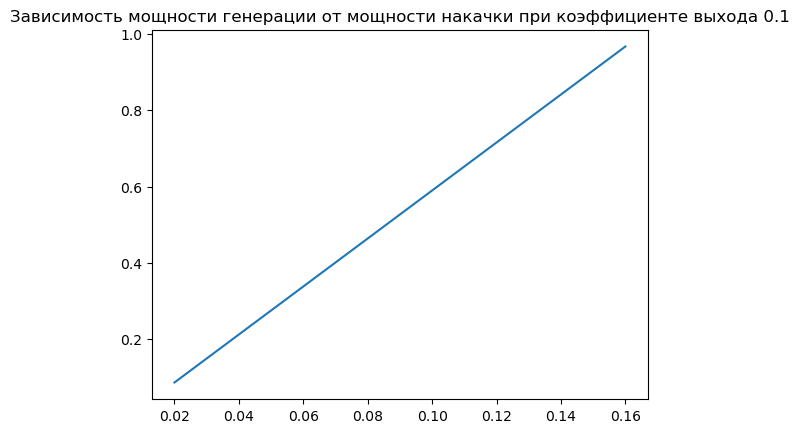

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
# Константы
t21 = 10e-3
h = 6.6e-34
Aeff = 3.14 * (2e-6)**2
Gp = 0.83
Gs = 0.5311143935168284
C = 3e8
hs = 1550e-9
hp = 980e-9
Ner = 1.9e25
alphap = 0.006
alphas = 0.0
l = 3
dhs = 0.16e-9
sigma12S = 3.198e-25
sigma21S = 4.4e-25
sigma12P = 2.245e-25
sigma21P = 0.0
z0 = 0
Z = 100
H = l / Z
z = np.linspace(z0, l, Z)
# Функции для расчета изменений концентраций и мощностей
def dN2(z, N2, Pp, Ps):
    return Gp * hp / (h * C * Aeff ) * (sigma12P * (Ner - N2) - sigma21P * N2) * Pp + Gs * hs / (h * C * Aeff) * \
           (sigma12S * (Ner  - N2) - sigma21S * N2) * Ps - N2 / t21
def dPp(z, N2, Pp):
    return Gp * (sigma21P * N2 - sigma12P * (Ner - N2)) * Pp - alphap * Pp
def dPs(z, N2, Ps):
    return Gs * (sigma21S * N2 - sigma12S * (Ner  - N2)) * Ps - alphas * Ps + 2 * sigma21S * N2 * h * C**2 * dhs / (hs**3)
# Объединяем функции в одну для использования в solve_ivp
def system(t, y):
    N2, Pp, Ps = y
    return [dN2(t, N2, Pp, Ps), dPp(t, N2, Pp), dPs(t, N2, Ps)]
# Функция для численного решения системы ОДУ методом Рунге-Кутты 4-го порядка
def propa(Pp0, Ps0):
    # Начальные условия
    N20 = 0.0
    # Решение системы дифференциальных уравнений методом Рунге-Кутта четвертого порядка
    sol = solve_ivp(system, [z0, l], [N20, Pp0, Ps0], method='RK45', max_step=H)
    # Получение решений
    N2 = sol.y[0]
    Pp = sol.y[1]
    Ps = sol.y[2]
    # Интерполяция решений на сетку z
    N2_interp = np.interp(z, sol.t, N2)
    Pp_interp = np.interp(z, sol.t, Pp)
    Ps_interp = np.interp(z, sol.t, Ps) 
    return N2_interp, Pp_interp, Ps_interp

#Для 10% выхода +
N21_10, Pp1_10, Ps1_10 = propa(40e-3, 0.1912963324501913)
N22_10, Pp2_10, Ps2_10 = propa(60e-3, 0.30451305180016086)
N23_10, Pp3_10, Ps3_10 = propa(80e-3, 0.41772969980178976)
N24_10, Pp4_10, Ps4_10 = propa(100e-3, 0.5309464521971589)
N25_10, Pp5_10, Ps5_10 = propa(120e-3, 0.6441630618351992)
N26_10, Pp6_10, Ps6_10 = propa(20e-3, 0.07807953647479024)
N27_10, Pp7_10, Ps7_10 = propa(140e-3,  0.7573796997803831)
N28_10, Pp8_10, Ps8_10 = propa(160e-3,  0.87059639073044)
PP_10 = np.array([Pp6_10[0], Pp1_10[0], Pp2_10[0], Pp3_10[0], Pp4_10[0], Pp5_10[0], Pp7_10[0], Pp8_10[0]])
PS_10 = np.array([Ps6_10[-1],Ps1_10[-1], Ps2_10[-1], Ps3_10[-1], Ps4_10[-1], Ps5_10[-1], Ps7_10[-1], Ps8_10[-1]])
plt.plot(PP_10, PS_10, label ='EDF L=6m, Coupling ratio=0.8')
plt.title("Зависимость мощности генерации от мощности накачки при коэффициенте выхода 0.1")

Text(0.5, 1.0, 'Зависимость мощности генерации от мощности накачки при коэффициенте выхода 0.01')

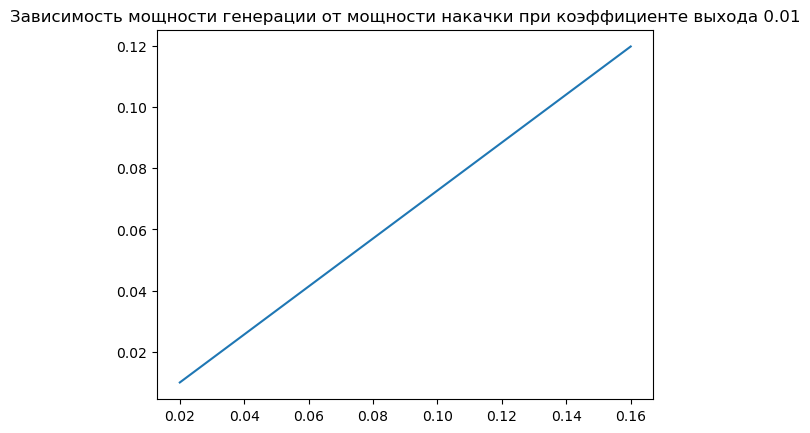

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
# Константы
t21 = 10e-3
h = 6.6e-34
Aeff = 3.14 * (2e-6)**2
Gp = 0.83
Gs = 0.5311143935168284
C = 3e8
hs = 1550e-9
hp = 980e-9
Ner = 1.9e25
alphap = 0.006
alphas = 0.0
l = 3
dhs = 0.16e-9
sigma12S = 3.198e-25
sigma21S = 4.4e-25
sigma12P = 2.245e-25
sigma21P = 0.0
z0 = 0
Z = 100
H = l / Z
z = np.linspace(z0, l, Z)
# Функции для расчета изменений концентраций и мощностей
def dN2(z, N2, Pp, Ps):
    return Gp * hp / (h * C * Aeff ) * (sigma12P * (Ner - N2) - sigma21P * N2) * Pp + Gs * hs / (h * C * Aeff) * \
           (sigma12S * (Ner  - N2) - sigma21S * N2) * Ps - N2 / t21
def dPp(z, N2, Pp):
    return Gp * (sigma21P * N2 - sigma12P * (Ner - N2)) * Pp - alphap * Pp
def dPs(z, N2, Ps):
    return Gs * (sigma21S * N2 - sigma12S * (Ner  - N2)) * Ps - alphas * Ps + 2 * sigma21S * N2 * h * C**2 * dhs / (hs**3)
# Объединяем функции в одну для использования в solve_ivp
def system(t, y):
    N2, Pp, Ps = y
    return [dN2(t, N2, Pp, Ps), dPp(t, N2, Pp), dPs(t, N2, Ps)]
# Функция для численного решения системы ОДУ методом Рунге-Кутты 4-го порядка
def propa(Pp0, Ps0):
    # Начальные условия
    N20 = 0.0
    # Решение системы дифференциальных уравнений методом Рунге-Кутта четвертого порядка
    sol = solve_ivp(system, [z0, l], [N20, Pp0, Ps0], method='RK45', max_step=H)
    # Получение решений
    N2 = sol.y[0]
    Pp = sol.y[1]
    Ps = sol.y[2]
    # Интерполяция решений на сетку z
    N2_interp = np.interp(z, sol.t, N2)
    Pp_interp = np.interp(z, sol.t, Pp)
    Ps_interp = np.interp(z, sol.t, Ps) 
    return N2_interp, Pp_interp, Ps_interp

#Для 1% выхода +
N21_1, Pp1_1, Ps1_1 = propa(40e-3, 2.108428640198686)
N22_1, Pp2_1, Ps2_1 = propa(60e-3, 3.3540120236779125)
N23_1, Pp3_1, Ps3_1 = propa(80e-3, 4.599596285864246)
N24_1, Pp4_1, Ps4_1 = propa(100e-3,  5.845179211165245)
N25_1, Pp5_1, Ps5_1 = propa(120e-3, 7.090762837109806)
N26_1, Pp6_1, Ps6_1 = propa(20e-3, 0.8628446206566399)
N27_1, Pp7_1, Ps7_1 = propa(140e-3,  8.336347516393648)
N28_1, Pp8_1, Ps8_1 = propa(160e-3,  9.581930740849693)
PP_1 = np.array([Pp6_1[0], Pp1_1[0], Pp2_1[0], Pp3_1[0], Pp4_1[0], Pp5_1[0], Pp7_1[0], Pp8_1[0]])
PS_1 = np.array([Ps6_1[-1],Ps1_1[-1], Ps2_1[-1], Ps3_1[-1], Ps4_1[-1], Ps5_1[-1], Ps7_1[-1], Ps8_1[-1]])
plt.plot(PP_80, PS_80, label ='EDF L=6m, Coupling ratio=0.8')
plt.title("Зависимость мощности генерации от мощности накачки при коэффициенте выхода 0.01")